**Work Flow** </br>
Loading all the required modeules. </br>
Inspecting data.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [28]:
data=pd.read_csv("data.csv")
print(data.shape)

(1000, 17)


Dataset contains 1000 rows and 17 columns. 

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Checking if we have any null values and counting them.

In [5]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Dataset contains no null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


We have a gender column that contains the gender of the buyers. Lets see whats the of men or women. Normally its understood women shop a lot but here we can actually test it.

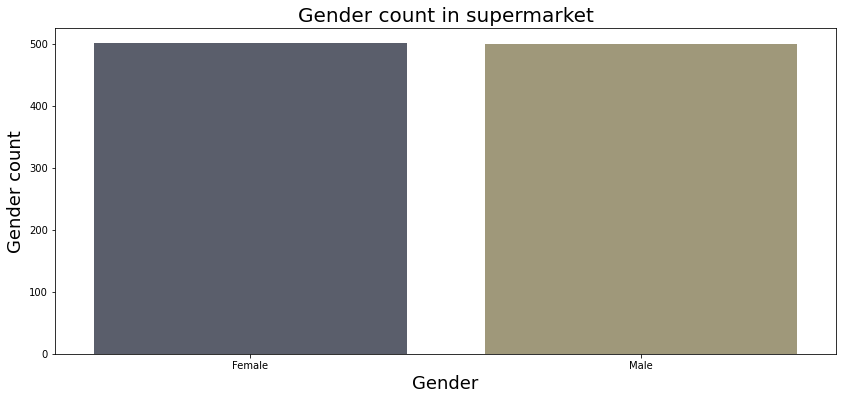

In [15]:
plt.figure(figsize=(14,6))
#plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=data , palette = 'cividis')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

From this visualization its hard to tell any difference. 49% of people are men and 51% is women entering the store.

We check the total column with respect to gender. Total column represents the amount of money people spend when the enter the store. 

In [29]:
data['Gender'][10 : 20]

10    Female
11      Male
12    Female
13      Male
14    Female
15    Female
16    Female
17      Male
18      Male
19    Female
Name: Gender, dtype: object

In [30]:
data['Total'][10 : 20]

10     60.8160
11    107.1420
12    246.4875
13    453.4950
14    749.4900
15    590.4360
16    506.6355
17    457.4430
18    172.2105
19     84.6300
Name: Total, dtype: float64

In [22]:
data.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


So women spend more money as compared to the opposite gender.

We have a column named customer type. Lets see what are the different customer types.

In [26]:
data['Customer type'].value_counts()


Member    501
Normal    499
Name: Customer type, dtype: int64

So we have almost same number of customer types. We can check who spends more money members or non-members.

In [27]:
data.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


**Member** Spend more money. Now i will check the total sales with respect to each city. 

In [33]:
data['City'].value_counts().sort_values(ascending = False)

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Almost the same number of sales in each city not a huge difference.

Now we can check the famous products that are sold often.

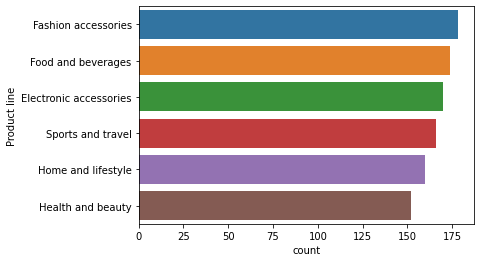

In [36]:
sns.countplot(y = 'Product line', data=data, order = data['Product line'].value_counts().index )

People spend more money fashion, food and drinks, and electronics product as compared to the other products.

We can see which gender spends most on the each of the product line.

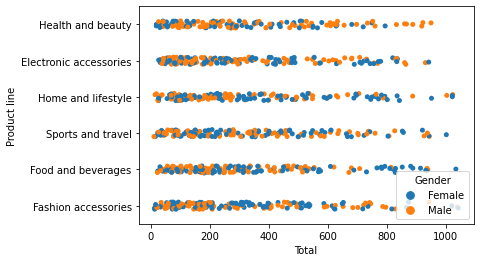

In [38]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=data )

Let see how customers make payment.

Text(0.5, 1.0, 'Payment Channel')

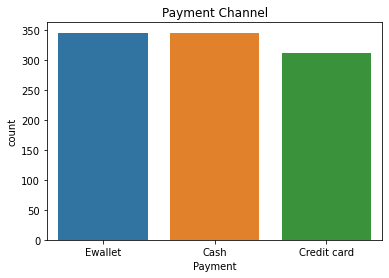

In [39]:
 sns.countplot(x="Payment", data =data).set_title("Payment Channel")

So Ewallet and cash payment is popular method for payment. 

We can also see the distribution of each payment method with respect to 

Text(0.5, 1.0, 'Payment Channel by City')

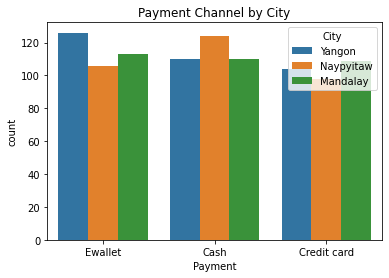

In [42]:
sns.countplot(x="Payment", hue = "City", data =data).set_title("Payment Channel by City") 

Cash payment method is highest in the Naypyitaw city.

We have a cloumn named time and quantity. We can check the busy hour or rush hour when more products are sold or quantity is higher during the opening hours

In [43]:
data["Time"][10:20]

10    18:07
11    17:03
12    10:25
13    16:48
14    19:21
15    16:19
16    11:03
17    10:39
18    18:00
19    15:30
Name: Time, dtype: object

In [52]:
data['Quantity'][10:20]

10     4
11     4
12     5
13    10
14    10
15     6
16     7
17     6
18     3
19     2
Name: Quantity, dtype: int64

In [44]:
data["con_Time"]= pd.to_datetime(data["Time"])

In [45]:
data["con_Time"][10:20]

10   2020-07-17 18:07:00
11   2020-07-17 17:03:00
12   2020-07-17 10:25:00
13   2020-07-17 16:48:00
14   2020-07-17 19:21:00
15   2020-07-17 16:19:00
16   2020-07-17 11:03:00
17   2020-07-17 10:39:00
18   2020-07-17 18:00:00
19   2020-07-17 15:30:00
Name: con_Time, dtype: datetime64[ns]

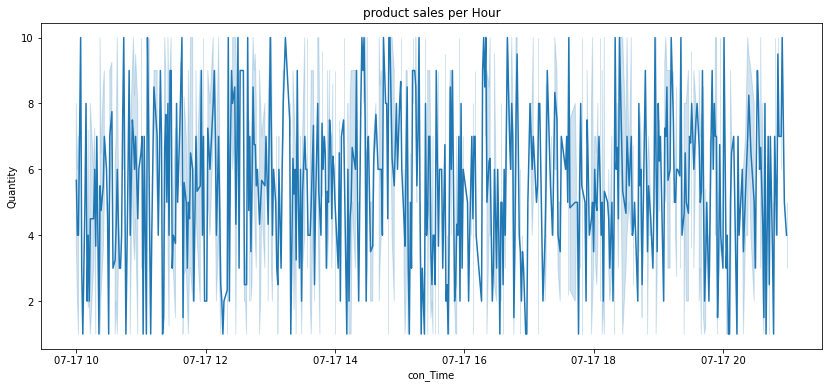

In [46]:
plt.figure(figsize=(14,6)) 
SalesTime = sns.lineplot(x="con_Time", y ="Quantity", data = data).set_title("product sales per Hour")

In [47]:
#Convert it into hour.
data["Hour"]= (data["con_Time"]).dt.hour

In [49]:
# Now we have the values in the format of hours like 1 -24
data['Hour'][10:20] 

10    18
11    17
12    10
13    16
14    19
15    16
16    11
17    10
18    18
19    15
Name: Hour, dtype: int64

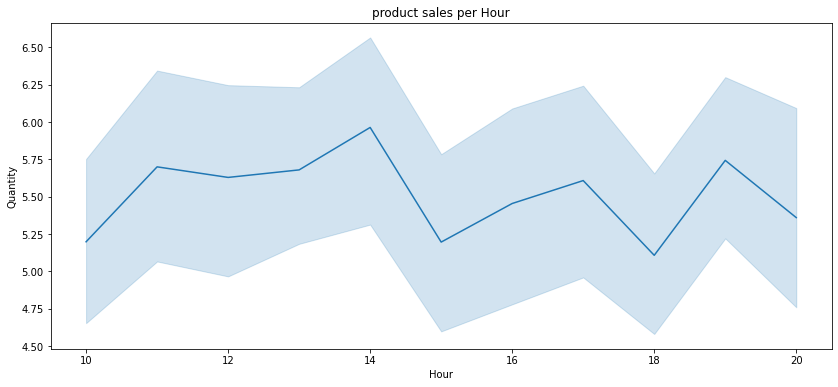

In [50]:
plt.figure(figsize=(14,6)) 
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = data).set_title("product sales per Hour")

That's more clear so most quantity of products are sold around 14.00 or (2:00 pm)

To be continued ....